In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fdm import fdm
import scipy
from helper import get_df_all, download
from pathlib import Path
import emd
from sklearn.model_selection import train_test_split

import requests
from tqdm.auto import tqdm

In [2]:
working_dir = Path('.')
DATA_PATH = Path("./Data")
save_model_path = working_dir / 'Model'
DE_path = DATA_PATH / '12k_DE'
FE_path = DATA_PATH / '12k_FE'


for path in [DATA_PATH, save_model_path]:
    if not path.exists():
        path.mkdir(parents=True)

In [3]:
s_len = 200
data = get_df_all(DE_path, segment_length=s_len)

In [4]:
data

,label,filename,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,1,B007_0.mat,-0.002761,-0.096324,0.113705,0.257297,-0.058314,-0.126050,0.207430,0.172669,...,0.125237,0.171856,-0.152039,-0.061725,0.296282,0.117603,-0.224160,0.006985,0.256810,-0.012183
1,1,B007_0.mat,-0.145379,0.184039,0.237480,-0.085116,-0.040284,0.190536,-0.002761,-0.196709,...,0.018030,-0.046294,0.007797,0.086415,0.146516,0.074233,-0.035248,-0.021604,0.057827,-0.027127
2,1,B007_0.mat,-0.118415,0.038010,0.082842,-0.029563,-0.000650,0.076832,-0.080405,-0.079106,...,-0.081380,0.085928,-0.054578,-0.209866,0.006335,0.206617,0.064812,-0.087553,0.012832,0.170394
3,1,B007_0.mat,0.047269,-0.070010,0.016731,0.095674,0.084466,-0.039147,-0.122963,-0.059451,...,0.116628,-0.227409,-0.003086,0.303754,0.055390,-0.111918,0.095674,0.177866,-0.026152,-0.141481
4,1,B007_0.mat,-0.045482,0.008771,-0.030700,-0.024365,0.002761,-0.004386,0.035411,0.007472,...,-0.102334,-0.046132,0.068710,-0.002599,-0.050192,0.028264,0.117116,0.030375,-0.050030,0.052791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45021,3,OR021@6_3.mat,-0.039797,-0.193704,-0.162841,0.021523,0.075938,0.011777,-0.012589,0.060913,...,-1.213390,1.010347,1.208517,-0.894611,-0.588827,1.480596,0.421519,-1.356739,0.112080,1.253187
45022,3,OR021@6_3.mat,-0.023147,-0.873089,0.101928,0.457661,-0.416240,-0.703750,0.038578,0.087309,...,-0.022335,-0.002030,0.215633,0.191673,0.019898,0.149846,0.252993,0.028832,-0.193704,0.020710
45023,3,OR021@6_3.mat,0.143349,-0.078781,-0.114111,0.104365,0.106801,-0.090964,-0.085685,-0.005279,...,-0.032487,0.133197,-0.047512,-0.301317,-0.175024,0.009340,-0.218475,-0.324058,-0.196140,0.000812
45024,3,OR021@6_3.mat,0.120608,-0.000406,-0.058477,0.058477,0.071878,0.054010,0.108019,0.103552,...,0.201826,0.090151,0.081624,0.158374,0.146192,0.160405,0.112080,-0.019898,-0.064974,0.056040


In [5]:
features = data.T[2:]

In [6]:
features

,0,1,2,3,4,5,6,7,8,9,...,45016,45017,45018,45019,45020,45021,45022,45023,45024,45025
0,-0.002761,-0.145379,-0.118415,0.047269,-0.045482,0.064324,-0.022091,0.068548,-0.060426,0.177217,...,-0.399184,-0.083654,-0.179491,-0.160405,-0.30619,-0.039797,-0.023147,0.143349,0.120608,0.066598
1,-0.096324,0.184039,0.03801,-0.07001,0.008771,-0.001462,-0.082192,-0.0614,-0.140831,-0.04337,...,-0.282637,-0.039391,0.079999,-0.19411,-0.373601,-0.193704,-0.873089,-0.078781,-0.000406,-0.075126
2,0.113705,0.23748,0.082842,0.016731,-0.0307,0.049055,0.104283,-0.02599,0.072446,-0.209379,...,-0.082842,-0.090964,0.217257,0.049543,-0.01137,-0.162841,0.101928,-0.114111,-0.058477,-0.091776
3,0.257297,-0.085116,-0.029563,0.095674,-0.024365,0.101522,0.038497,0.11939,0.107857,0.045319,...,-0.578675,-0.077969,-0.11939,0.060507,0.252587,0.021523,0.457661,0.104365,0.058477,-0.036142
4,-0.058314,-0.040284,-0.00065,0.084466,0.002761,0.055878,-0.20012,0.054741,-0.124913,0.220749,...,-0.460504,0.079999,-0.263145,-0.169339,0.144567,0.075938,-0.41624,0.106801,0.071878,-0.046294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.117603,0.074233,0.206617,-0.111918,0.028264,0.129461,-0.111268,0.136121,0.016731,0.036873,...,-0.132385,-0.186394,0.156344,0.077157,0.095431,1.480596,0.149846,0.00934,0.160405,-2.629419
196,-0.22416,-0.035248,0.064812,0.095674,0.117116,0.248688,0.114354,0.021929,0.166009,0.04337,...,-0.027208,-0.21076,0.120608,-0.288322,0.079999,0.421519,0.252993,-0.218475,0.11208,1.241817
197,0.006985,-0.021604,-0.087553,0.177866,0.030375,0.024365,0.068548,0.001624,0.036061,0.171856,...,0.174618,0.176648,-0.141319,-0.429235,-0.047918,-1.356739,0.028832,-0.324058,-0.019898,1.251969
198,0.25681,0.057827,0.012832,-0.026152,-0.05003,-0.044182,-0.029888,0.16942,-0.141643,0.153339,...,0.098679,0.219287,0.052385,-0.210353,-0.038984,0.11208,-0.193704,-0.19614,-0.064974,-1.935008


In [7]:
features = features.T
features = np.asarray(features)

In [8]:
features

array([[-0.0027613972055888225, -0.09632403193612774,
        0.11370459081836327, ..., 0.006984710578842315,
        0.2568099401197605, -0.012182634730538922],
       [-0.14537944111776446, 0.18403900199600798, 0.2374801596806387,
        ..., -0.021603872255489022, 0.057826906187624746,
        -0.027126666666666667],
       [-0.11841520958083833, 0.03800982035928144, 0.08284191616766468,
        ..., -0.08755253493013972, 0.012832375249500998,
        0.1703944510978044],
       ...,
       [0.143349001996008, -0.0787810379241517, -0.11411067864271457,
        ..., -0.3240580838323353, -0.19614041916167665,
        0.0008121756487025948],
       [0.12060808383233533, -0.0004060878243512974,
        -0.05847664670658683, ..., -0.019898303393213572,
        -0.06497405189620759, 0.05604011976047904],
       [0.06659840319361278, -0.07512624750499002, -0.0917758483033932,
        ..., 1.25196876247505, -1.935008483033932, -1.2686183632734531]],
      dtype=object)

In [10]:
labels = data['label']
labels = np.asarray(labels)
labels
svc_label = labels

In [11]:
# Class Representation
label_count = [0,0,0,0]
label_example = [0,0,0,0]
for curr,i in enumerate(labels):
    label_count[i] = label_count[i]+1
    label_example[i] = features[curr]
label_count

[8491, 9726, 9732, 17077]

In [12]:
#Class Representation as Percentage
label_count = np.asarray(label_count)
label_count = label_count/sum(label_count)*100
label_count

array([18.85799316, 21.60085284, 21.61417847, 37.92697553])

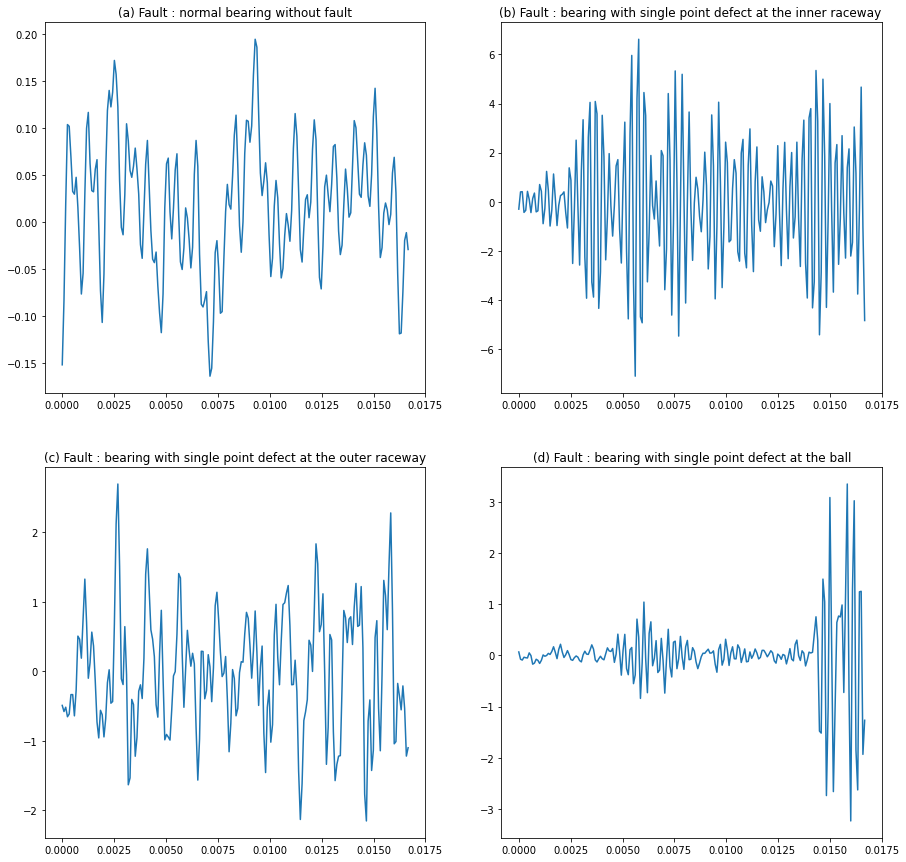

In [15]:
temp = np.linspace(0,s_len/12000,s_len)
plt.figure(figsize=(15,15))
names = ['normal bearing without fault', 'bearing with single point defect at the inner raceway ', 'bearing with single point defect at the outer raceway', 'bearing with single point defect at the ball']
alphabet = ['a','b','c','d']
for i in range(0,4,1):
    plt.subplot(2,2,i+1)
    plt.plot(temp,label_example[i])
    plt.title('('+alphabet[i]+') Fault : '+names[i])

Represented Class : 1


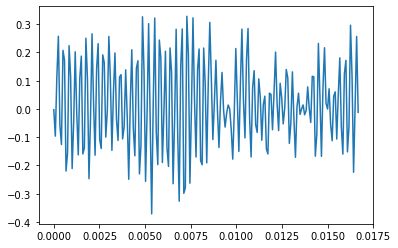

In [16]:
s = 0
plt.plot(np.linspace(0,s_len/12000,s_len),features[s])
print("Represented Class : "+(str)(labels[s]))

In [17]:
fs = 12000
def create_fibfs(samples,subbands):
    fibfs = []
    for i in range(0,len(samples),1):
        sample = samples[i]
        sample=np.reshape(sample,(len(sample),1))
        fibfs.append(fdm(sample,fs=12000,fc=np.array([375,750,1500,3000,6000]),filter_type='dct',plot_subbands=subbands))
    return np.array(fibfs)

<Figure size 432x288 with 0 Axes>

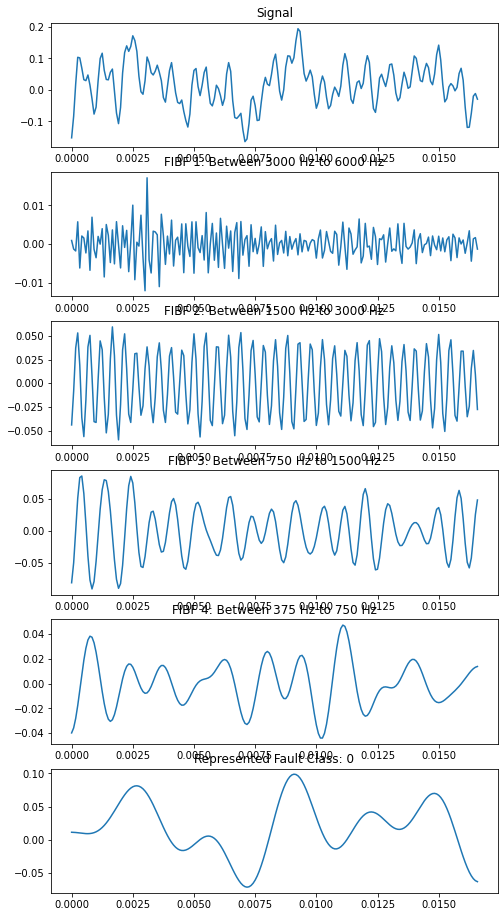

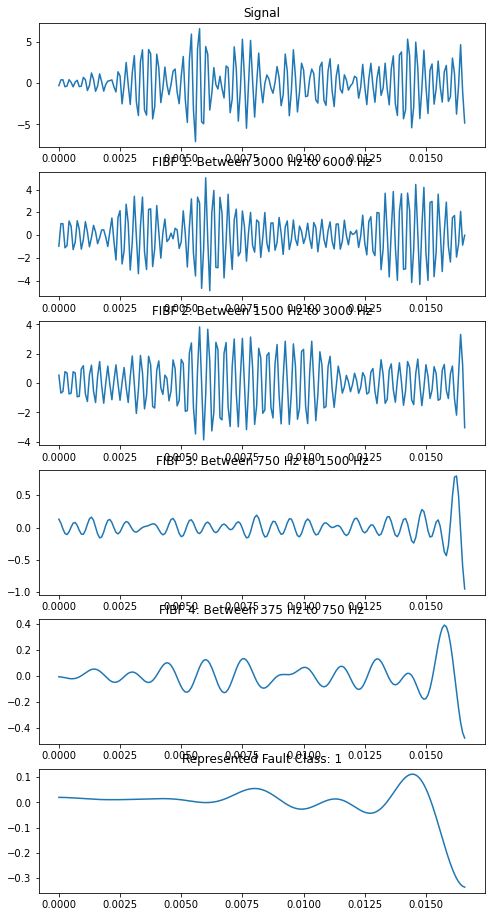

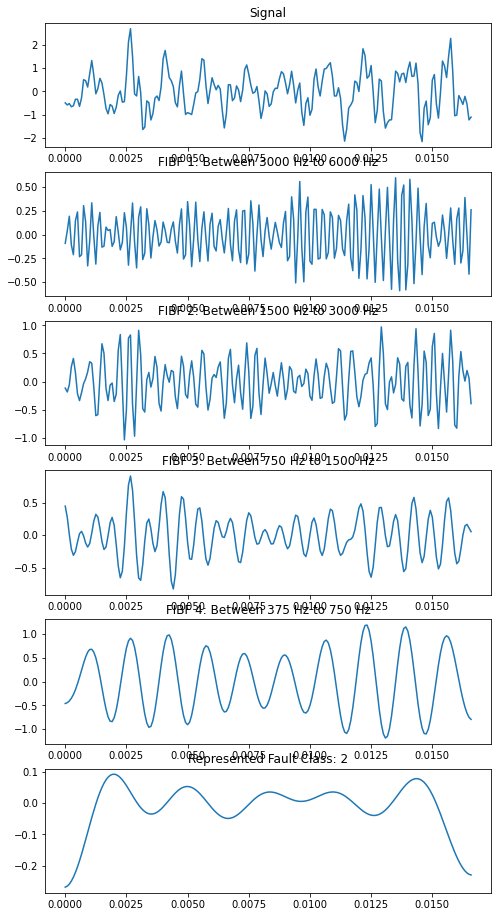

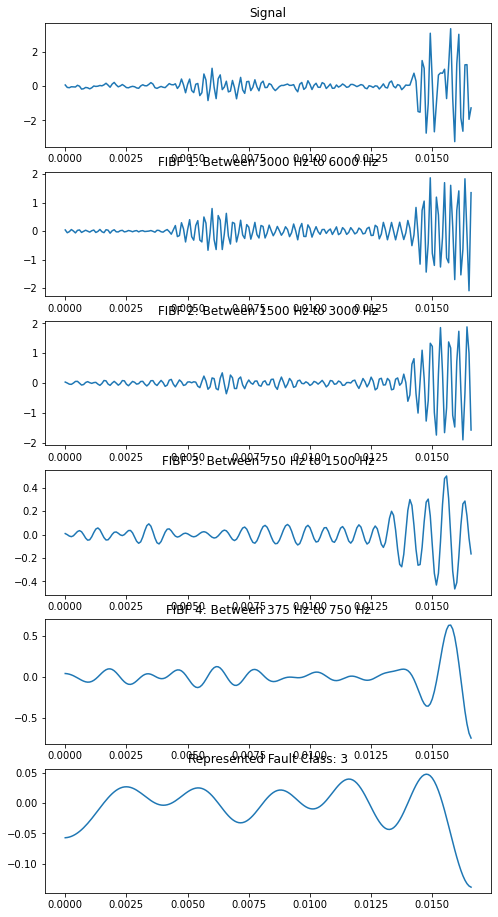

In [30]:
for i in range(0,4,1):
    val = create_fibfs(label_example[i:i+1],True)
    plt.title("Represented Fault Class: "+(str)(i))

In [42]:
from keras.utils import to_categorical
labels = to_categorical(labels)
test_label = to_categorical(labels)

In [43]:
labels

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [44]:
idx = np.random.permutation(len(features))
features , labels = features[idx], labels[idx]

In [45]:
fibfs = create_fibfs(features,False)

In [46]:
test_fibfs = fibfs[-9000:]
fibfs = fibfs[0:-9000]
test_labels = labels[-9000:]
labels = labels[:-9000]

In [47]:
np.shape(labels)

(36026, 4)

In [48]:
np.shape(fibfs)

(36026, 200, 5)

In [49]:
def get_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(acc)+1)
    
    plt.plot(epochs,acc,'bo',label = 'Training acc')
    plt.plot(epochs,val_acc,'b',label = 'Validation acc')
    plt.title('Training and validation Accuracy')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs,loss,'bo',label='Training Loss')
    plt.plot(epochs,val_loss,'b',label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.figure()

In [50]:
from keras import layers,models

def get_model():
    input_seq = layers.Input(shape = (s_len,5))
    conv1 = layers.Conv1D(24,7,padding="same", activation="tanh")(input_seq)
    pool1 = layers.MaxPooling1D(5)(conv1)
    conv2 = layers.Conv1D(24,9,padding="same", activation="tanh")(pool1)
    processed = layers.GlobalMaxPooling1D()(conv2)
    compressed = layers.Dense(50, activation="relu")(processed)
    compressed = layers.Dropout(0.3)(compressed)
    out = layers.Dense(4, activation='softmax')(compressed)
    model = models.Model(inputs=input_seq, outputs=out)
    model.compile(optimizer = 'RMSprop',loss='kullback_leibler_divergence',metrics=['accuracy'])
    return model

Epoch 1/35
901/901 [==============================] - 16s 14ms/step - loss: 0.4370 - accuracy: 0.8270 - val_loss: 0.1598 - val_accuracy: 0.9424
Epoch 2/35
901/901 [==============================] - 13s 15ms/step - loss: 0.1440 - accuracy: 0.9483 - val_loss: 0.1353 - val_accuracy: 0.9473
Epoch 3/35
901/901 [==============================] - 4s 5ms/step - loss: 0.1027 - accuracy: 0.9628 - val_loss: 0.0820 - val_accuracy: 0.9710
Epoch 4/35
901/901 [==============================] - 4s 5ms/step - loss: 0.0838 - accuracy: 0.9696 - val_loss: 0.0878 - val_accuracy: 0.9691
Epoch 5/35
901/901 [==============================] - 5s 5ms/step - loss: 0.0718 - accuracy: 0.9742 - val_loss: 0.0919 - val_accuracy: 0.9682
Epoch 6/35
901/901 [==============================] - 4s 5ms/step - loss: 0.0624 - accuracy: 0.9782 - val_loss: 0.1223 - val_accuracy: 0.9539
Epoch 7/35
901/901 [==============================] - 4s 5ms/step - loss: 0.0557 - accuracy: 0.9803 - val_loss: 0.0534 - val_accuracy: 0.9793
Ep

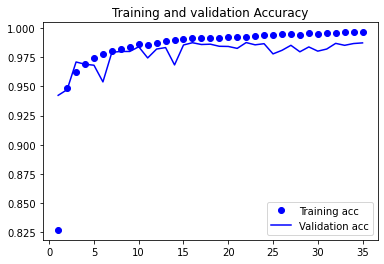

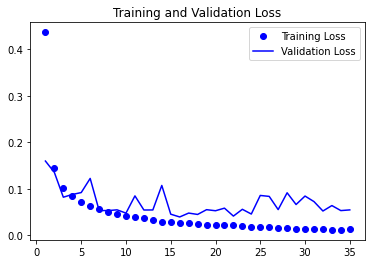

<Figure size 432x288 with 0 Axes>

In [51]:
temp_model = get_model()
history = temp_model.fit(fibfs,labels,epochs=35,validation_split=0.2)
get_curves(history)

In [52]:
k = 12
num_val_samples = len(fibfs)//k
validation_scores = []
model = None
for fold in range(k):
    val_data = fibfs[num_val_samples*fold:num_val_samples*(fold+1)]
    val_label = labels[num_val_samples*fold:num_val_samples*(fold+1)]
    train_data = np.concatenate((fibfs[:num_val_samples*fold],fibfs[num_val_samples*(fold+1):]))
    train_label = np.concatenate((labels[:num_val_samples*fold],labels[num_val_samples*(fold+1):]))
    model = get_model()
    model.fit(train_data,train_label,epochs=30)
    val_score = model.evaluate(val_data,val_label)
    validation_scores.append(val_score)

Epoch 1/30
1032/1032 [==============================] - 9s 7ms/step - loss: 0.4330 - accuracy: 0.8237
Epoch 2/30
1032/1032 [==============================] - 7s 7ms/step - loss: 0.1459 - accuracy: 0.9483
Epoch 3/30
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0997 - accuracy: 0.9640
Epoch 4/30
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0831 - accuracy: 0.9713
Epoch 5/30
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0698 - accuracy: 0.9750
Epoch 6/30
1032/1032 [==============================] - 7s 6ms/step - loss: 0.0616 - accuracy: 0.9783
Epoch 7/30
1032/1032 [==============================] - 7s 6ms/step - loss: 0.0530 - accuracy: 0.9807
Epoch 8/30
1032/1032 [==============================] - 6s 6ms/step - loss: 0.0491 - accuracy: 0.9824
Epoch 9/30
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0443 - accuracy: 0.9839
Epoch 10/30
1032/1032 [==============================] - 7s 7ms/step - loss: 0.043

1032/1032 [==============================] - 7s 7ms/step - loss: 0.0234 - accuracy: 0.9916
Epoch 20/30
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0224 - accuracy: 0.9920
Epoch 21/30
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0215 - accuracy: 0.9929
Epoch 22/30
1032/1032 [==============================] - 6s 6ms/step - loss: 0.0200 - accuracy: 0.9932
Epoch 23/30
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0190 - accuracy: 0.9938
Epoch 24/30
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0189 - accuracy: 0.9936
Epoch 25/30
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0193 - accuracy: 0.9938
Epoch 26/30
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0166 - accuracy: 0.9942
Epoch 27/30
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0160 - accuracy: 0.9946
Epoch 28/30
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0155 -

1032/1032 [==============================] - 4s 4ms/step - loss: 0.0211 - accuracy: 0.9931
Epoch 25/30
1032/1032 [==============================] - 4s 4ms/step - loss: 0.0210 - accuracy: 0.9930
Epoch 26/30
1032/1032 [==============================] - 4s 4ms/step - loss: 0.0184 - accuracy: 0.9939
Epoch 27/30
1032/1032 [==============================] - 4s 4ms/step - loss: 0.0194 - accuracy: 0.9937
Epoch 28/30
1032/1032 [==============================] - 4s 4ms/step - loss: 0.0188 - accuracy: 0.9942
Epoch 29/30
1032/1032 [==============================] - 4s 4ms/step - loss: 0.0158 - accuracy: 0.9947
Epoch 30/30
94/94 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9860
Epoch 1/30
1032/1032 [==============================] - 5s 4ms/step - loss: 0.4392 - accuracy: 0.8214
Epoch 2/30
1032/1032 [==============================] - 4s 4ms/step - loss: 0.1378 - accuracy: 0.9505
Epoch 3/30
1032/1032 [==============================] - 4s 4ms/step - loss: 0.0994 - accura

In [53]:
validation_scores

[[0.04914097487926483, 0.9896735548973083],
 [0.06672530621290207, 0.9843437671661377],
 [0.05662995204329491, 0.9870086312294006],
 [0.13593417406082153, 0.9720186591148376],
 [0.050673630088567734, 0.9886742234230042],
 [0.06310310959815979, 0.9873417615890503],
 [0.06029176712036133, 0.9866755604743958],
 [0.04947138950228691, 0.9860092997550964],
 [0.06240946799516678, 0.9850099682807922],
 [0.05789738520979881, 0.9870086312294006],
 [0.0890468880534172, 0.984010636806488],
 [0.07823383808135986, 0.9846768975257874]]

In [54]:
validation_scores = np.array(validation_scores)
sum(validation_scores)/len(validation_scores)

array([0.06829649, 0.9852043 ])

In [55]:
y_pred = temp_model.predict(test_fibfs)

282/282 [==============================] - 1s 2ms/step


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [58]:
accuracy_score(np.argmax(y_pred, axis=-1),np.argmax(test_labels,-1))

0.9874444444444445

In [61]:
cm = confusion_matrix(np.argmax(y_pred, axis=-1),np.argmax(test_labels,-1),normalize = 'true')

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

In [63]:
cmd = ConfusionMatrixDisplay(cm)

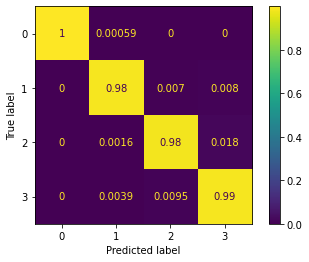

In [64]:
cmd.plot()
plt.show()